In [14]:
import pandas as pd
import numpy as np
import time
import xgboost as xgb
from sklearn.model_selection import KFold,GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn import  metrics
%matplotlib inline

In [2]:
full_data = pd.read_csv('full_data_freq.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_size = train_data.shape[0]
test_size = test_data.shape[0]

In [3]:
cols = list(full_data.columns.values)
cols.remove('id')
cols.remove('loss')
cols

['cont1',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cat109_freq',
 'cat110_freq',
 'cat112_freq',
 'cat113_freq',
 'cat116_freq',
 'cat1_A',
 'cat1_B',
 'cat10_A',
 'cat10_B',
 'cat100_A',
 'cat100_B',
 'cat100_C',
 'cat100_D',
 'cat100_E',
 'cat100_F',
 'cat100_G',
 'cat100_H',
 'cat100_I',
 'cat100_J',
 'cat100_K',
 'cat100_L',
 'cat100_M',
 'cat100_N',
 'cat100_O',
 'cat101_A',
 'cat101_B',
 'cat101_C',
 'cat101_D',
 'cat101_E',
 'cat101_F',
 'cat101_G',
 'cat101_H',
 'cat101_I',
 'cat101_J',
 'cat101_K',
 'cat101_L',
 'cat101_M',
 'cat101_N',
 'cat101_O',
 'cat101_Q',
 'cat101_R',
 'cat101_S',
 'cat101_U',
 'cat102_A',
 'cat102_B',
 'cat102_C',
 'cat102_D',
 'cat102_E',
 'cat102_F',
 'cat102_G',
 'cat102_H',
 'cat102_J',
 'cat103_A',
 'cat103_B',
 'cat103_C',
 'cat103_D',
 'cat103_E',
 'cat103_F',
 'cat103_G',
 'cat103_H',
 'cat103_I',
 'cat103_J',
 'cat103_K',
 'cat103_L',
 'cat103_M',
 

In [4]:
feat = cols

In [5]:
train_x = full_data[:train_size][feat]
test_x = full_data[train_size:][feat]
train_y = np.log(full_data[:train_size].loss.values+200)
ID = full_data[train_size:].id.values

In [6]:
from scipy.stats import skew, boxcox
skew(full_data[:train_size].loss.values)

3.7949281496777445

In [7]:
skew(np.log(full_data[:train_size].loss.values+200))

0.3014089397765396

In [8]:
full_data[:train_size].loss.max(), full_data[:train_size].loss.min()

(121012.25, 0.67)

In [9]:
train_y.max(), train_y.min()

(11.70529842011712, 5.301661767798426)

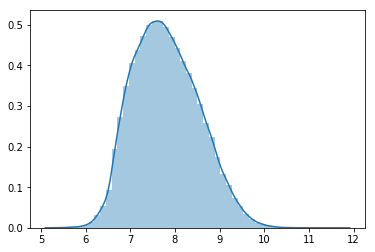

In [10]:
sns.distplot(train_y)

In [12]:
def log_mae(y,yhat):
    return metrics.mean_absolute_error(np.exp(y), np.exp(yhat))

log_mae_scorer = metrics.make_scorer(log_mae, greater_is_better = False)

In [15]:
cv_params = {'n_estimators':[50,100,150,200,250]}
other_params = {'max_depth':8, 'min_samples_split':100,'max_features':'sqrt',
                'random_state':1234}
RF_model = RandomForestRegressor(**other_params)
optimized_RF = GridSearchCV(estimator=RF_model, param_grid=cv_params, scoring=log_mae_scorer, cv=4, verbose=6, n_jobs=3)
optimized_RF.fit(train_x, train_y)
print("Best score: %0.3f" % optimized_RF.best_score_)
print("Best parameters set:", optimized_RF.best_params_)
print("Scores:", optimized_RF.cv_results_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  2.1min
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:  8.1min finished


Best score: -1358.116
Best parameters set: {'n_estimators': 100}
Scores: {'mean_fit_time': array([32.98769373, 44.32476246, 59.01732123, 78.60788643, 84.42037851]), 'std_fit_time': array([ 2.82585242,  1.55236796,  2.05229719,  1.75008842, 11.86692192]), 'mean_score_time': array([0.77704149, 1.21144331, 1.49189121, 1.93672276, 1.89464301]), 'std_score_time': array([0.06316948, 0.10892221, 0.0764414 , 0.14167967, 0.23038395]), 'param_n_estimators': masked_array(data=[50, 100, 150, 200, 250],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 150}, {'n_estimators': 200}, {'n_estimators': 250}], 'split0_test_score': array([-1355.2330884 , -1353.36028585, -1352.9577255 , -1354.34080833,
       -1353.4685767 ]), 'split1_test_score': array([-1369.77983088, -1364.25589704, -1364.18107292, -1365.37631531,
       -1365.13375244]), 'split2_test_score': array([-1363.31271

In [16]:
cv_params = {'n_estimators':[80,90,100,100,120]}
other_params = {'max_depth':8, 'min_samples_split':100,'max_features':'sqrt',
                'random_state':1234}
RF_model = RandomForestRegressor(**other_params)
optimized_RF = GridSearchCV(estimator=RF_model, param_grid=cv_params, scoring=log_mae_scorer, cv=4, verbose=6, n_jobs=3)
optimized_RF.fit(train_x, train_y)
print("Best score: %0.3f" % optimized_RF.best_score_)
print("Best parameters set:", optimized_RF.best_params_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  2.5min
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:  5.8min finished


Best score: -1357.571
Best parameters set: {'n_estimators': 120}


In [17]:
cv_params = {'n_estimators':[110,120,130]}
other_params = {'max_depth':8, 'min_samples_split':100,'max_features':'sqrt',
                'random_state':1234}
RF_model = RandomForestRegressor(**other_params)
optimized_RF = GridSearchCV(estimator=RF_model, param_grid=cv_params, scoring=log_mae_scorer, cv=4, verbose=6, n_jobs=3)
optimized_RF.fit(train_x, train_y)
print("Best score: %0.3f" % optimized_RF.best_score_)
print("Best parameters set:", optimized_RF.best_params_)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  2.9min
[Parallel(n_jobs=3)]: Done  10 out of  12 | elapsed:  4.0min remaining:   47.5s
[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:  4.0min finished


Best score: -1357.401
Best parameters set: {'n_estimators': 110}


In [18]:
cv_params = {'max_depth':[3,6,9,12,15]}
other_params = {'n_estimators':110,'min_samples_split':100,'max_features':'sqrt',
                'random_state':1234}
RF_model = RandomForestRegressor(**other_params)
optimized_RF = GridSearchCV(estimator=RF_model, param_grid=cv_params, scoring=log_mae_scorer, cv=4, verbose=10, n_jobs=3)
optimized_RF.fit(train_x, train_y)
print("Best score: %0.3f" % optimized_RF.best_score_)
print("Best parameters set:", optimized_RF.best_params_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
/Users/xingjuan/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/xingjuan/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/xingjuan/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarnin

Best score: -1261.327
Best parameters set: {'max_depth': 15}


In [19]:
cv_params = {'max_depth':[13,14,15,16,17]}
other_params = {'n_estimators':110,'min_samples_split':100,'max_features':'sqrt',
                'random_state':1234}
RF_model = RandomForestRegressor(**other_params)
optimized_RF = GridSearchCV(estimator=RF_model, param_grid=cv_params, scoring=log_mae_scorer, cv=4, verbose=10, n_jobs=3)
optimized_RF.fit(train_x, train_y)
print("Best score: %0.3f" % optimized_RF.best_score_)
print("Best parameters set:", optimized_RF.best_params_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  1.6min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  4.4min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  6.1min
[Parallel(n_jobs=3)]: Done  18 out of  20 | elapsed:  9.3min remaining:  1.0min
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed: 10.6min finished


Best score: -1250.945
Best parameters set: {'max_depth': 17}


In [20]:
cv_params = {'max_depth':[17,19,21,22]}
other_params = {'n_estimators':110,'min_samples_split':100,'max_features':'sqrt',
                'random_state':1234}
RF_model = RandomForestRegressor(**other_params)
optimized_RF = GridSearchCV(estimator=RF_model, param_grid=cv_params, scoring=log_mae_scorer, cv=4, verbose=10, n_jobs=3)
optimized_RF.fit(train_x, train_y)
print("Best score: %0.3f" % optimized_RF.best_score_)
print("Best parameters set:", optimized_RF.best_params_)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  5.2min
[Parallel(n_jobs=3)]: Done  13 out of  16 | elapsed:  9.0min remaining:  2.1min
[Parallel(n_jobs=3)]: Done  16 out of  16 | elapsed: 10.3min finished


Best score: -1238.480
Best parameters set: {'max_depth': 22}


In [21]:
cv_params = {'max_depth':[23,25,27,29]}
other_params = {'n_estimators':110,'min_samples_split':100,'max_features':'sqrt',
                'random_state':1234}
RF_model = RandomForestRegressor(**other_params)
optimized_RF = GridSearchCV(estimator=RF_model, param_grid=cv_params, scoring=log_mae_scorer, cv=4, verbose=10, n_jobs=3)
optimized_RF.fit(train_x, train_y)
print("Best score: %0.3f" % optimized_RF.best_score_)
print("Best parameters set:", optimized_RF.best_params_)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  2.2min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  6.2min
[Parallel(n_jobs=3)]: Done  13 out of  16 | elapsed: 10.3min remaining:  2.4min
[Parallel(n_jobs=3)]: Done  16 out of  16 | elapsed: 11.7min finished


Best score: -1234.724
Best parameters set: {'max_depth': 29}


In [24]:
cv_params = {'max_depth':[29,31,33,35]}
other_params = {'n_estimators':110,'min_samples_split':100,'max_features':'sqrt',
                'random_state':1234}
RF_model = RandomForestRegressor(**other_params)
optimized_RF = GridSearchCV(estimator=RF_model, param_grid=cv_params, scoring=log_mae_scorer, cv=4, verbose=10, n_jobs=3)
optimized_RF.fit(train_x, train_y)
print("Best score: %0.3f" % optimized_RF.best_score_)
print("Best parameters set:", optimized_RF.best_params_)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  2.2min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  6.3min
[Parallel(n_jobs=3)]: Done  13 out of  16 | elapsed: 10.5min remaining:  2.4min
[Parallel(n_jobs=3)]: Done  16 out of  16 | elapsed: 11.9min finished


Best score: -1233.915
Best parameters set: {'max_depth': 33}


In [25]:
cv_params = {'max_depth':[32,33,34]}
other_params = {'n_estimators':110,'min_samples_split':100,'max_features':'sqrt',
                'random_state':1234}
RF_model = RandomForestRegressor(**other_params)
optimized_RF = GridSearchCV(estimator=RF_model, param_grid=cv_params, scoring=log_mae_scorer, cv=4, verbose=10, n_jobs=3)
optimized_RF.fit(train_x, train_y)
print("Best score: %0.3f" % optimized_RF.best_score_)
print("Best parameters set:", optimized_RF.best_params_)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  2.3min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  6.5min
[Parallel(n_jobs=3)]: Done   9 out of  12 | elapsed:  6.5min remaining:  2.2min
[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:  8.6min finished


Best score: -1233.592
Best parameters set: {'max_depth': 34}


In [26]:
cv_params = {'max_depth':[34,36,38]}
other_params = {'n_estimators':110,'min_samples_split':100,'max_features':'sqrt',
                'random_state':1234}
RF_model = RandomForestRegressor(**other_params)
optimized_RF = GridSearchCV(estimator=RF_model, param_grid=cv_params, scoring=log_mae_scorer, cv=4, verbose=10, n_jobs=3)
optimized_RF.fit(train_x, train_y)
print("Best score: %0.3f" % optimized_RF.best_score_)
print("Best parameters set:", optimized_RF.best_params_)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  2.2min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  6.4min
[Parallel(n_jobs=3)]: Done   9 out of  12 | elapsed:  6.4min remaining:  2.1min
[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:  8.5min finished


Best score: -1233.418
Best parameters set: {'max_depth': 36}


In [27]:
cv_params = {'max_depth':[40]}
other_params = {'n_estimators':110,'min_samples_split':100,'max_features':'sqrt',
                'random_state':1234}
RF_model = RandomForestRegressor(**other_params)
optimized_RF = GridSearchCV(estimator=RF_model, param_grid=cv_params, scoring=log_mae_scorer, cv=4, verbose=10, n_jobs=3)
optimized_RF.fit(train_x, train_y)
print("Best score: %0.3f" % optimized_RF.best_score_)
print("Best parameters set:", optimized_RF.best_params_)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  2.3min
[Parallel(n_jobs=3)]: Done   2 out of   4 | elapsed:  2.3min remaining:  2.3min
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:  3.6min remaining:    0.0s
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:  3.6min finished


Best score: -1233.758
Best parameters set: {'max_depth': 40}


In [28]:
cv_params = {'min_samples_split':[50,100,150,200]}
other_params = {'n_estimators':110,'max_depth':36,'max_features':'sqrt',
                'random_state':1234}
RF_model = RandomForestRegressor(**other_params)
optimized_RF = GridSearchCV(estimator=RF_model, param_grid=cv_params, scoring=log_mae_scorer, cv=4, verbose=10, n_jobs=3)
optimized_RF.fit(train_x, train_y)
print("Best score: %0.3f" % optimized_RF.best_score_)
print("Best parameters set:", optimized_RF.best_params_)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  2.5min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  6.7min
[Parallel(n_jobs=3)]: Done  13 out of  16 | elapsed: 10.5min remaining:  2.4min
[Parallel(n_jobs=3)]: Done  16 out of  16 | elapsed: 11.7min finished


Best score: -1220.989
Best parameters set: {'min_samples_split': 50}


In [29]:
cv_params = {'min_samples_split':[20,40,60]}
other_params = {'n_estimators':110,'max_depth':36,'max_features':'sqrt',
                'random_state':1234}
RF_model = RandomForestRegressor(**other_params)
optimized_RF = GridSearchCV(estimator=RF_model, param_grid=cv_params, scoring=log_mae_scorer, cv=4, verbose=10, n_jobs=3)
optimized_RF.fit(train_x, train_y)
print("Best score: %0.3f" % optimized_RF.best_score_)
print("Best parameters set:", optimized_RF.best_params_)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  2.9min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  7.9min
[Parallel(n_jobs=3)]: Done   9 out of  12 | elapsed:  8.0min remaining:  2.7min
[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed: 10.2min finished


Best score: -1211.377
Best parameters set: {'min_samples_split': 20}


In [31]:
optimal_params = {'n_estimators':110,'max_depth':36,'min_samples_split':20,'max_features':'sqrt',
                'random_state':1234}

### Random Forest Modeling 

In [33]:
model_RF = RandomForestRegressor(n_estimators=110,max_depth=36,min_samples_split=20,max_features='sqrt',
                                 random_state=1234)

In [34]:
model_RF.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=36,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=20,
           min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [37]:
pred_y = np.exp(model_RF.predict(test_x))-200
results = pd.DataFrame()
results['id'] = full_data[train_size:].id
results['loss'] = pred_y
results.to_csv('output_RF.csv', index=False)
print('Submission created')

Submission created
